## Data Input via APIs

This is about using an api "Application program interface" ...basic idea, allows
direct access to some database or parts of it without having do download everything

Documentation is here...

https://pandas-datareader.readthedocs.io/en/latest/index.html

This documentation is good too:

http://pandas-datareader.readthedocs.io/en/latest/remote_data.html

In [1]:
import os
import pandas
from pandas_datareader import data, wb # This will import the data reader
import matplotlib.pyplot as plt
import datetime 

%matplotlib inline 

In [2]:
#start = datetime.datetime(2005,1,1) # simple funcitonality of the datatime package
                                    # just specify the year, month, date and it returns
                                    # and object that the data reader will interpert


codes = ["GDPC1", "PCEC96"] # here are the codes, remember this from EGB?
                            # Honestly, this is the hardest part with APIs figuring
                            # out the codes to ask of the API

fred = data.DataReader(codes,"fred",2005)  # Then for fred, you hand it the codes
                                            # Tell it you want to ask from FRED
                                            # then tell it the start date

In [3]:
fred.head()

,GDPC1,PCEC96
DATE,,
2005-01-01,14099.081,9379.8
2005-02-01,NaN,9412.3
2005-03-01,NaN,9435.5
2005-04-01,14172.695,9510.4
2005-05-01,NaN,9463.2


In [4]:
fred.dropna(inplace = True)

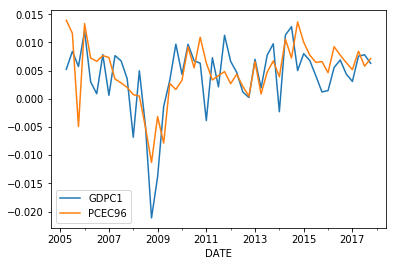

In [5]:
fred.pct_change().plot()


**Excercise** Can you find the unemployment rate for the US from FRED. Use the data reader. And create a plot of unemployment from the 2005 on ward. Challenge, can you create a histogram of unemployment rates?

In [6]:
start = datetime.datetime(2018,1,1)
end = datetime.datetime(2018,2,28)

In [7]:
ticker = 'AMZN'
stkqt = data.DataReader(ticker, 'quandl', start, end)

In [8]:
stkqt.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-02-28,1519.51,1528.70,1512.00,1512.45,4426580.0,0.0,1.0,1519.51,1528.70,1512.00,1512.45,4426580.0
2018-02-27,1524.50,1526.78,1507.21,1511.98,4708378.0,0.0,1.0,1524.50,1526.78,1507.21,1511.98,4708378.0
2018-02-26,1509.20,1522.84,1507.00,1521.95,4909053.0,0.0,1.0,1509.20,1522.84,1507.00,1521.95,4909053.0
2018-02-23,1495.34,1500.00,1486.50,1500.00,4327008.0,0.0,1.0,1495.34,1500.00,1486.50,1500.00,4327008.0
2018-02-22,1495.36,1502.54,1475.76,1484.76,4732555.0,0.0,1.0,1495.36,1502.54,1475.76,1484.76,4732555.0


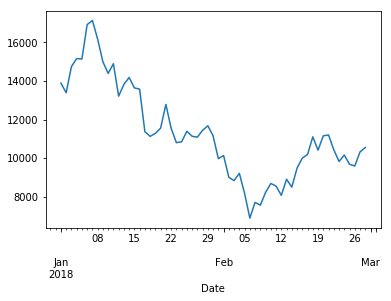

In [9]:
bitcoin = data.DataReader("BITSTAMP/USD", 'quandl', start, end)

bitcoin["Last"].plot()

In [10]:
bitcoin = data.DataReader("MSFT.US", 'quandl', start, end)

RemoteDataError: Unable to read URL: https://www.quandl.com/api/v3/datasets/WIKI/MSFT.csv?start_date=2018-01-01&order=asc&end_date=2018-02-28

In [47]:
bitcoin.shape

(40, 12)

**Exercise** Grab luluemon's data. Plot the closing value and the volume since the begining of the year.

In [11]:
lulu = data.DataReader(["LULU","UA"], 'google', start, end)

C:\Program Files\Anaconda3\lib\site-packages\pandas_datareader\base.py:201: SymbolWarning: Failed to read symbol: 'LULU', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Program Files\Anaconda3\lib\site-packages\pandas_datareader\base.py:201: SymbolWarning: Failed to read symbol: 'UA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


RemoteDataError: No data fetched using 'GoogleDailyReader'

In [35]:
lulu = lulu.to_frame()

In [36]:
lulu.head()

Open   High    Low  Close     Volume
Date       minor                                       
2018-01-02 LULU   77.31  80.27  77.31  79.69  2474756.0
           UA     13.45  14.01  13.23  13.97  6264809.0
2018-01-03 LULU   79.82  80.24  78.25  78.59  1745406.0
           UA     13.97  14.47  13.97  14.40  4839585.0
2018-01-04 LULU   78.61  80.01  78.30  79.85  1669563.0